In [38]:
import wavio
from pathlib import Path

import matplotlib.pyplot as plt

from itertools import chain

from importlib import reload

import break_points
import declicker

In [22]:
wav_filename = Path('sample.wav')

wav = wavio.read(str(wav_filename))

signed_24_bit_int_max_value = 2 ** 23
signal = wav.data[:, 0] / signed_24_bit_int_max_value

## Дельты между соседними сэмплами

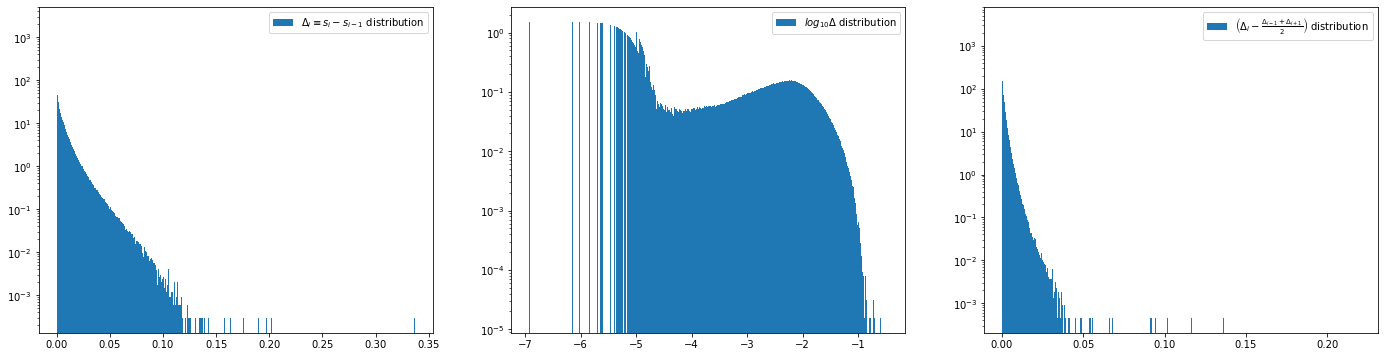

In [24]:
break_point_indicator = break_points.calculate_and_plot_diffs(signal)

## Точки разрыва

10 breaks


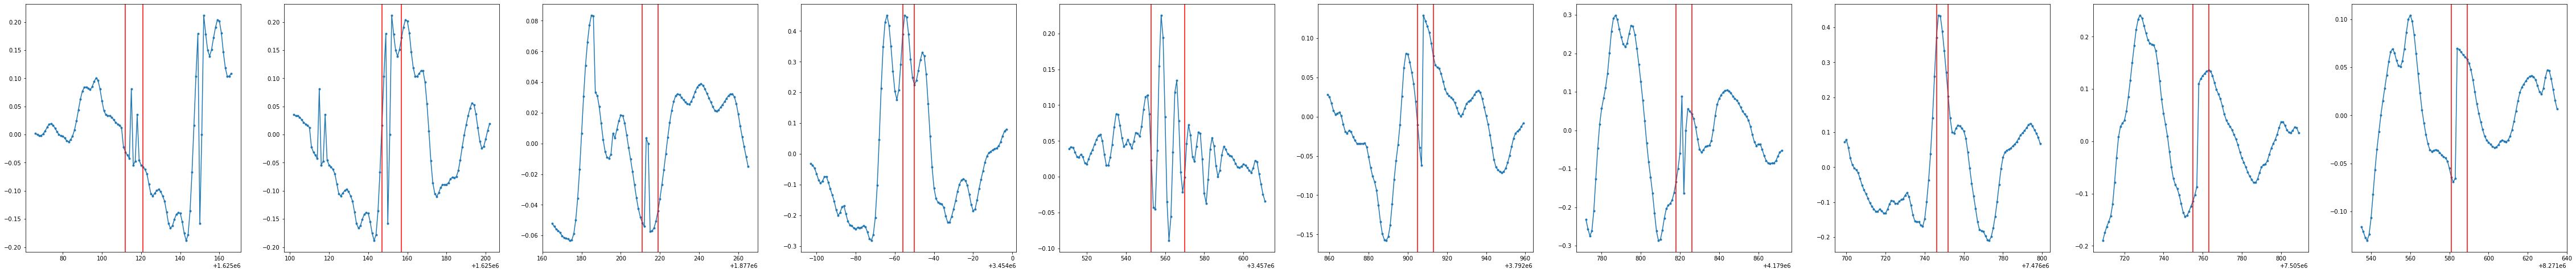

In [35]:
threshold = 0.05  # from rightmost panel on previous plot
max_break_count = 20

break_bands = break_points.calculate_and_plot_break_regions(signal, break_point_indicator, threshold, max_break_count)

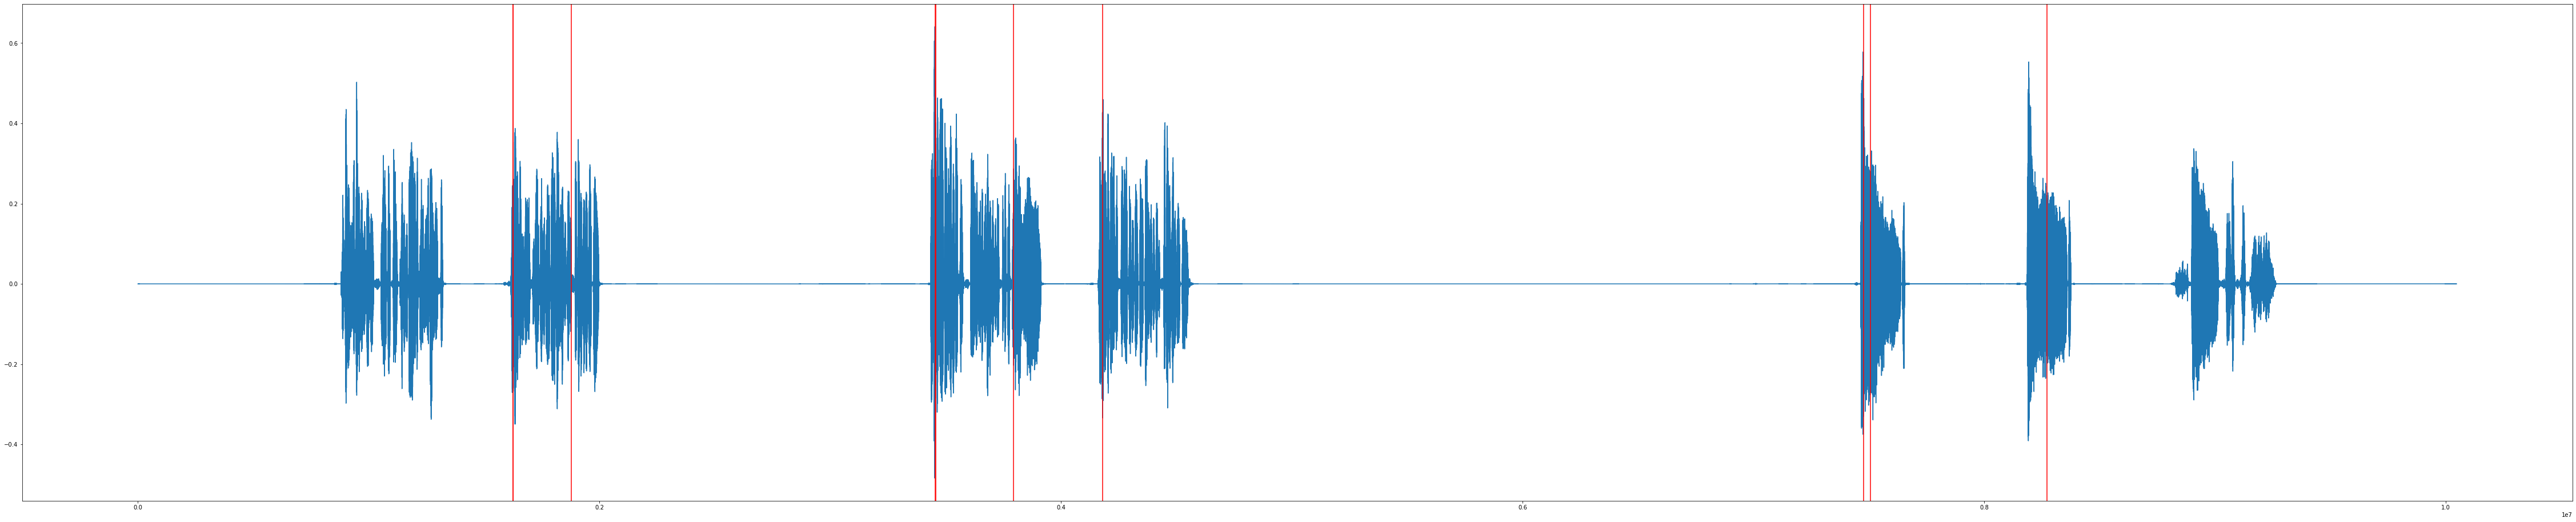

In [36]:
break_points.plot_break_positions(signal, break_bands)

## Исправление разрывов

In [42]:
reload(declicker)

<module 'declicker' from 'c:\\Users\\njvh\\Documents\\My Documents\\python-scripts\\audio-declicker\\declicker.py'>

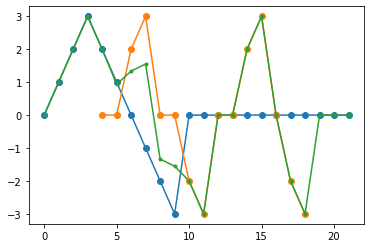

In [43]:
declicker.test_xfade()

In [324]:
result = declicker.declick_signal(signal, break_bands, stretch_overlap=1000)

wavio.write(wav_filename.stem + '-declicked' + wav_filename.suffix, (result * signed_24_bit_int_max_value), wav.rate, sampwidth=wav.sampwidth, scale='none')

[(0, 1625112), (1625121, 1625147), (1625157, 1877185), (1877191, 1877211), (1877219, 3449821), (3449827, 3453944), (3453950, 3454079), (3454085, 3455001), (3455007, 3457553), (3457570, 3458643), (3458649, 3459138), (3459153, 3459289), (3459295, 3460592), (3460598, 3464906), (3464912, 3465497), (3465503, 3792905), (3792913, 3795308), (3795314, 4179818), (4179826, 7476746), (7476752, 7505755), (7505763, 8271581), (8271589, 10045360)]
[(0, 1626112), (1624121, 1626147), (1624157, 1878185), (1876191, 1878211), (1876219, 3450821), (3448827, 3454944), (3452950, 3455079), (3453085, 3456001), (3454007, 3458553), (3456570, 3459643), (3457649, 3460138), (3458153, 3460289), (3458295, 3461592), (3459598, 3465906), (3463912, 3466497), (3464503, 3793905), (3791913, 3796308), (3794314, 4180818), (4178826, 7477746), (7475752, 7506755), (7504763, 8272581), (8270589, 10045360)]
100%|██████████| 21/21 [00:02<00:00,  7.13it/s]


## Печать результата

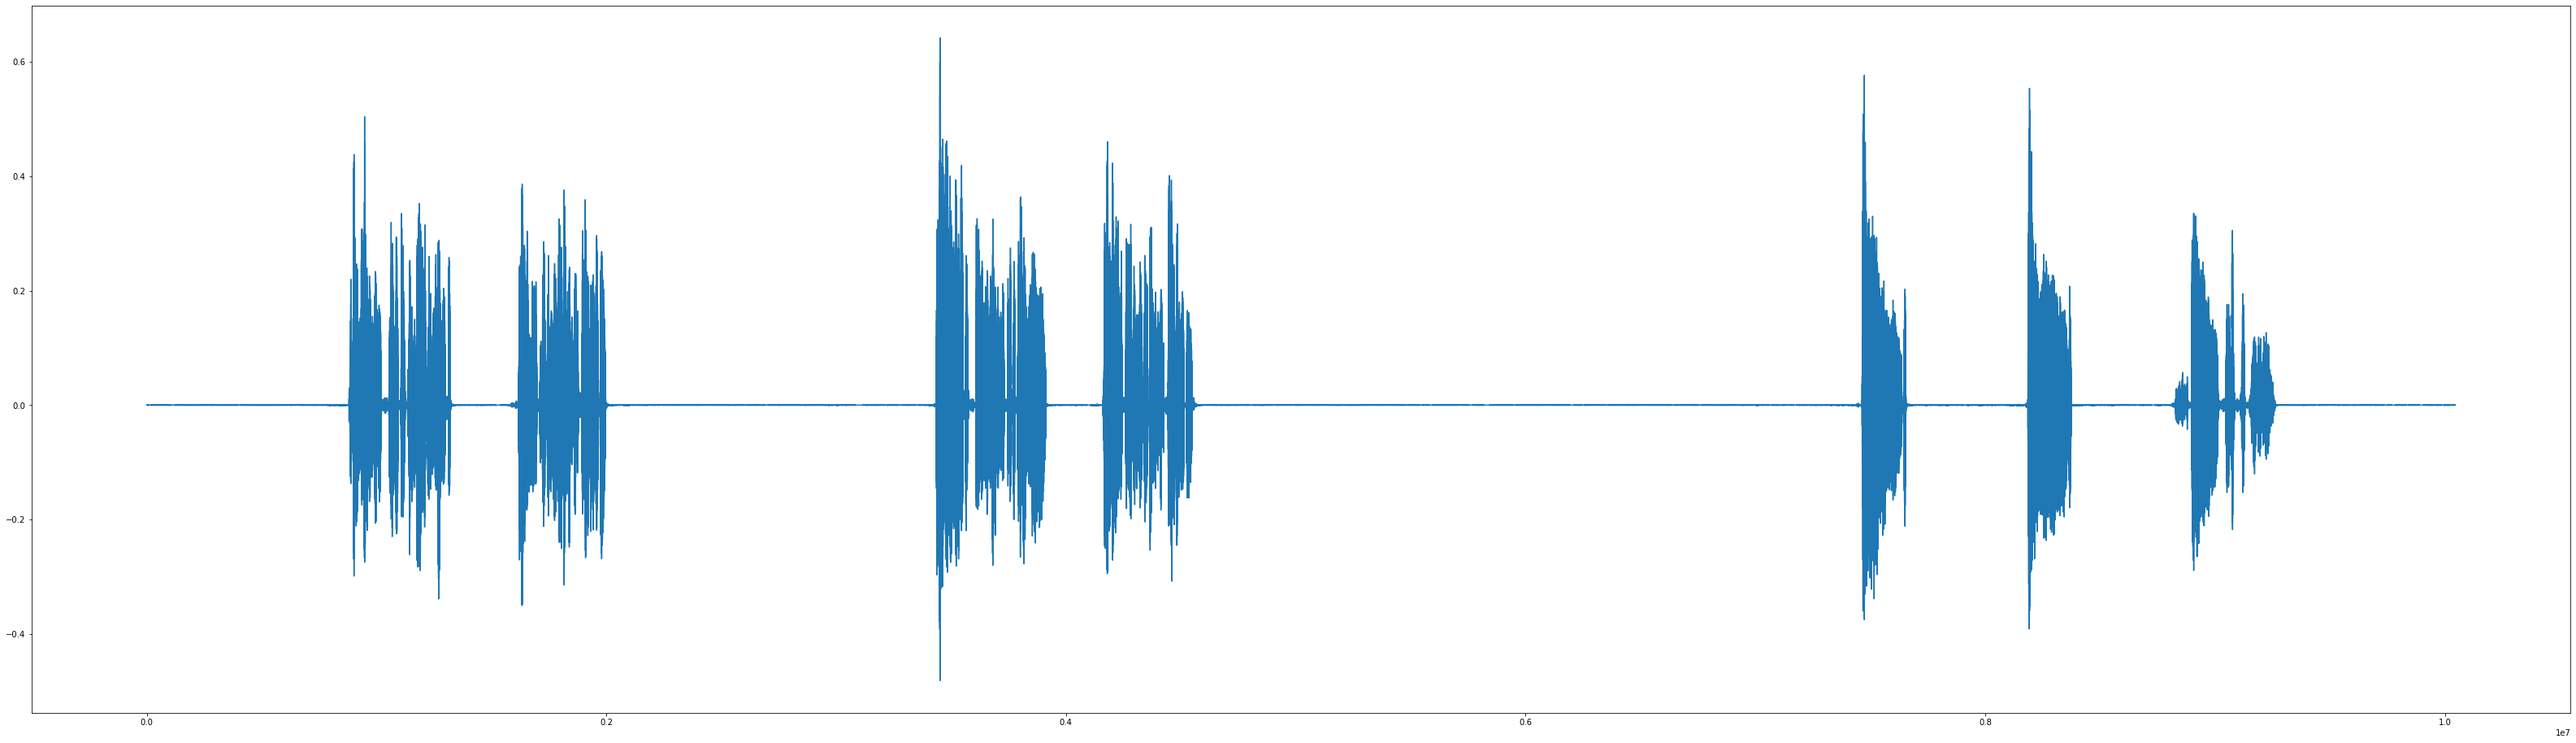

In [298]:
fig = plt.figure(figsize=(8 * break_count, 16))
ax = fig.gca()

plt.plot(out)

plt.show()

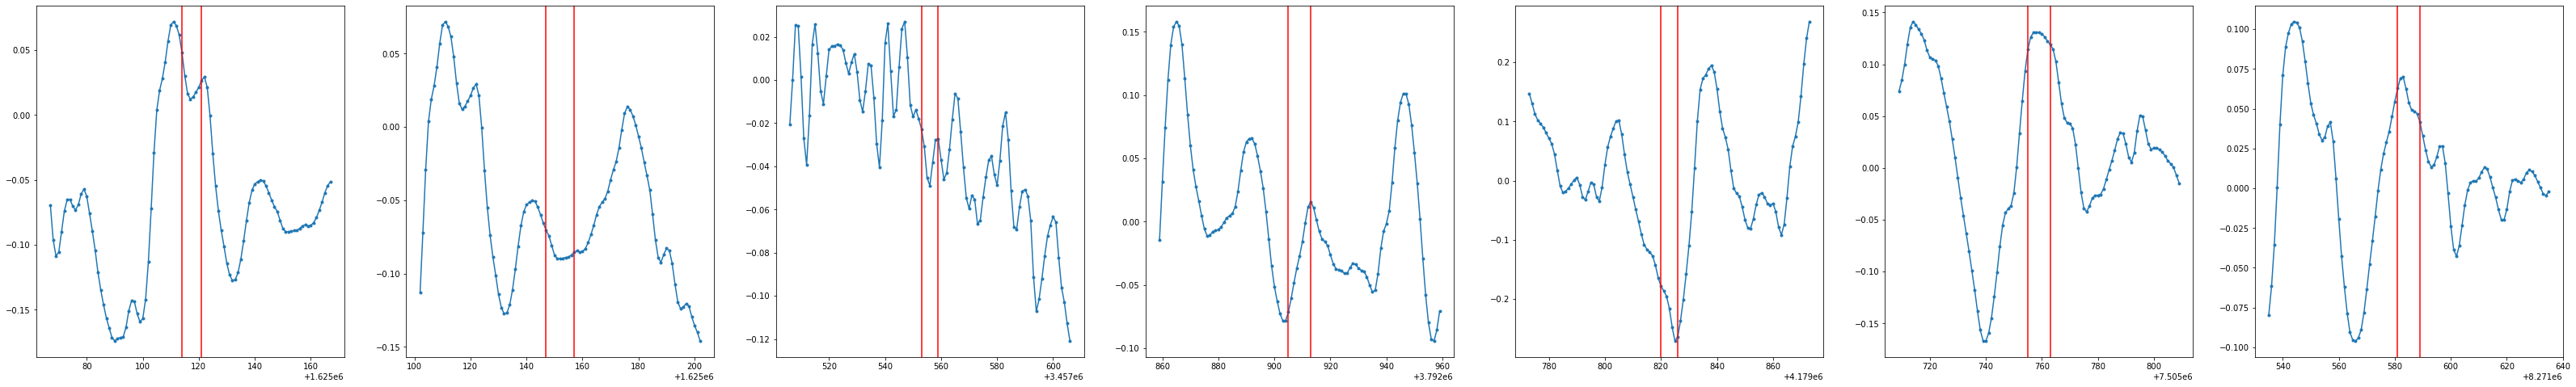

In [299]:
if break_count > 0 and break_count <= 35:
    _, axes = plt.subplots(1, break_count, figsize=(8 * break_count,8))
    for i, break_band in enumerate(break_bands):
        break_center = int(0.5 * (break_band[0] + break_band[1]))
        start = (break_center - fragment_width)
        stop = (break_center + fragment_width + 1)
        axes[i].plot(range(start, stop), out[start:stop], '.-')
        axes[i].axvline(x=break_band[0], color='r')
        axes[i].axvline(x=break_band[1], color='r')
else:
    print(f'{break_count} breaks')

plt.show()